In [1]:
%pip install nfstream

  Using cached nfstream-6.5.3-cp39-cp39-win_amd64.whl (743 kB)
  Using cached cffi-1.16.0-cp39-cp39-win_amd64.whl (181 kB)
  Using cached dpkt-1.9.8-py3-none-any.whl (194 kB)
  Using cached pycparser-2.22-py3-none-any.whl (117 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\cs123\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
%pip install psutil

You should consider upgrading via the 'c:\Users\cs123\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
from nfstream import NFStreamer
# We display all streamer parameters with their default values.
# See documentation for detailed information about each parameter.
# https://www.nfstream.org/docs/api#nfstreamer
my_streamer = NFStreamer(source="C:/Users/cs123/Desktop/pcap files/111.pcapng", # or live network interface
                         decode_tunnels=True,
                         bpf_filter=None,
                         promiscuous_mode=True,
                         snapshot_length=1536,
                         idle_timeout=120,
                         active_timeout=1800,
                         accounting_mode=0,
                         udps=None,
                         n_dissections=20,
                         statistical_analysis=False,
                         splt_analysis=0,
                         n_meters=0,
                         max_nflows=0,
                         performance_report=0,
                         system_visibility_mode=0,
                         system_visibility_poll_ms=100)
                         
for flow in my_streamer:
    print(flow)  # print it.

NFlow(id=0,
      expiration_id=0,
      src_ip=2001:f40:90e:1533:1808:dd57:7032:1a8b,
      src_mac=ec:4e:f8:ed:3a:d4,
      src_oui=ec:4e:f8,
      src_port=50546,
      dst_ip=2a03:2880:f20c:2e5:face:b00c:0:4420,
      dst_mac=c4:fb:aa:24:e9:ee,
      dst_oui=c4:fb:aa,
      dst_port=443,
      protocol=17,
      ip_version=6,
      vlan_id=0,
      tunnel_id=0,
      bidirectional_first_seen_ms=1715521449935,
      bidirectional_last_seen_ms=1715521450448,
      bidirectional_duration_ms=513,
      bidirectional_packets=32,
      bidirectional_bytes=16667,
      src2dst_first_seen_ms=1715521449935,
      src2dst_last_seen_ms=1715521450447,
      src2dst_duration_ms=512,
      src2dst_packets=14,
      src2dst_bytes=6708,
      dst2src_first_seen_ms=1715521449949,
      dst2src_last_seen_ms=1715521450448,
      dst2src_duration_ms=499,
      dst2src_packets=18,
      dst2src_bytes=9959,
      application_name=QUIC.Instagram,
      application_category_name=SocialNetwork,
      appli

In [5]:
import psutil
NICs = psutil.net_if_addrs()
for NIC in NICs:
    print(NIC)


Radmin VPN
Ethernet
VME1
VMware Network Adapter VMnet1
VMware Network Adapter VMnet8
Wi-Fi
vEthernet (WSL)
OpenVPN Data Channel Offload
Loopback Pseudo-Interface 1


In [10]:
from nfstream import NFStreamer
my_streamer = NFStreamer(source="MediaTek Wi-Fi 6 MT7921 Wireless LAN Card", # Live capture mode. 
                         # Disable L7 dissection for readability purpose only.
                         n_dissections=0,
                         system_visibility_poll_ms=100,
                         system_visibility_mode=1)
                         
for flow in my_streamer:
    print(flow)  # print it.

NFlow(id=0,
      expiration_id=0,
      src_ip=192.168.100.98,
      src_mac=da:9e:00:2d:67:2b,
      src_oui=da:9e:00,
      src_port=5353,
      dst_ip=224.0.0.251,
      dst_mac=01:00:5e:00:00:fb,
      dst_oui=01:00:5e,
      dst_port=5353,
      protocol=17,
      ip_version=4,
      vlan_id=0,
      tunnel_id=0,
      bidirectional_first_seen_ms=1715522343533,
      bidirectional_last_seen_ms=1715522503313,
      bidirectional_duration_ms=159780,
      bidirectional_packets=17,
      bidirectional_bytes=1959,
      src2dst_first_seen_ms=1715522343533,
      src2dst_last_seen_ms=1715522503313,
      src2dst_duration_ms=159780,
      src2dst_packets=17,
      src2dst_bytes=1959,
      dst2src_first_seen_ms=0,
      dst2src_last_seen_ms=0,
      dst2src_duration_ms=0,
      dst2src_packets=0,
      dst2src_bytes=0,
      system_process_pid=-1,
      system_process_name=)
NFlow(id=1,
      expiration_id=0,
      src_ip=fe80::1,
      src_mac=c4:fb:aa:24:e9:ee,
      src_oui=c4:fb:aa

In [ ]:
from nfstream import NFStreamer
my_streamer = NFStreamer(source="MediaTek Wi-Fi 6 MT7921 Wireless LAN Card",
                         # Disable L7 dissection for readability purpose.
                         n_dissections=0,  
                         statistical_analysis=True)
for flow in my_streamer:
    print(flow)

In [3]:
# See documentation for more details.
# https://www.nfstream.org/docs/api#pandas-dataframe-conversion
from nfstream import NFStreamer
my_dataframe = NFStreamer(source="C:/Users/cs123/Desktop/pcap files/111.pcapng").to_pandas()[["src_ip",
                                                            "src_port",
                                                            "dst_ip", 
                                                            "dst_port", 
                                                            "protocol",
                                                            "bidirectional_packets",
                                                            "bidirectional_bytes",
                                                            "application_name"]]
my_dataframe.head(5)

,src_ip,src_port,dst_ip,dst_port,protocol,bidirectional_packets,bidirectional_bytes,application_name
0,2001:f40:90e:1533:1808:dd57:7032:1a8b,50546,2a03:2880:f20c:2e5:face:b00c:0:4420,443,17,32,16667,QUIC.Instagram
1,2001:f40:90e:1533:1808:dd57:7032:1a8b,49181,2404:6800:4001:806::2005,443,6,6,530,TLS
2,fe80::c49:3b9d:603b:f2bb,0,ff02::16,0,58,2,180,ICMPV6
3,192.168.100.21,49243,204.79.197.203,443,6,183,153547,TLS.Microsoft
4,192.168.100.21,49193,23.193.96.136,443,6,88,53287,TLS


In [4]:
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\cs123\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Using cached scikit_learn-1.4.2-cp39-cp39-win_amd64.whl (10.6 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached scipy-1.13.0-cp39-cp39-win_amd64.whl (46.2 MB)


You should consider upgrading via the 'c:\Users\cs123\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load network traffic data from CSV into DataFrame
df = pd.read_csv("C:/Users/cs123/Downloads/archive/dataset.csv")

# Convert IP addresses to integers
def ip_to_int(ip_series):
    return ip_series.apply(lambda ip: sum(int(ip_part) * 256 ** i for i, ip_part in enumerate(reversed(ip.split('.')))))

df['Source.IP'] = ip_to_int(df['Source.IP'])
df['Destination.IP'] = ip_to_int(df['Destination.IP'])

def classify_traffic(row):
    protocol_name = row['ProtocolName']
    l7_protocol = row['L7Protocol']
    
    if isinstance(protocol_name, str):
        if 'RealTimeCommunication' in protocol_name or 'VoIP' in protocol_name or 'VideoCalls' in protocol_name:
            return 'RealTimeCommunication'
        elif 'WebTraffic' in protocol_name or 'HTTP' in protocol_name:
            return 'WebTraffic'
        elif 'FileTransfers' in protocol_name or 'Downloads' in protocol_name:
            return 'FileTransfers'
        elif 'Email' in protocol_name or 'Messaging' in protocol_name:
            return 'CommunicationApps'
        elif 'BusinessApplications' in protocol_name:
            return 'BusinessApplications'
    
    if isinstance(l7_protocol, str) and 'HTTP' in l7_protocol:
        return 'WebTraffic'
    
    return 'OtherTraffic'

# Apply the classification function to create a new column for traffic categories
df["traffic_category"] = df.apply(classify_traffic, axis=1)

# Prepare features (X) and target variable (y) for the model
X = df[['Source.IP', 'Destination.IP', 'Protocol', 'Total.Fwd.Packets', 'Total.Backward.Packets', 
        'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Flow.Bytes.s', 'Flow.Packets.s',
        'Average.Packet.Size']]

y = df["traffic_category"]

# Initialize a RandomForestClassifier model
model = RandomForestClassifier()

# Fit the model on the data
model.fit(X, y)

RandomForestClassifier()

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Fit model on training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the trained model
import joblib
joblib.dump(model, 'traffic_classifier_model.pkl')

Cross-Validation Scores: [0.88931072 0.88915853 0.88936819 0.88827798 0.88935945]
Mean CV Accuracy: 0.8890949725226216
Classification Report:
              precision    recall  f1-score   support

OtherTraffic       0.90      0.90      0.90    390194
  WebTraffic       0.88      0.88      0.88    325266

    accuracy                           0.89    715460
   macro avg       0.89      0.89      0.89    715460
weighted avg       0.89      0.89      0.89    715460

Confusion Matrix:
[[350292  39902]
 [ 37966 287300]]


['traffic_classifier_model.pkl']

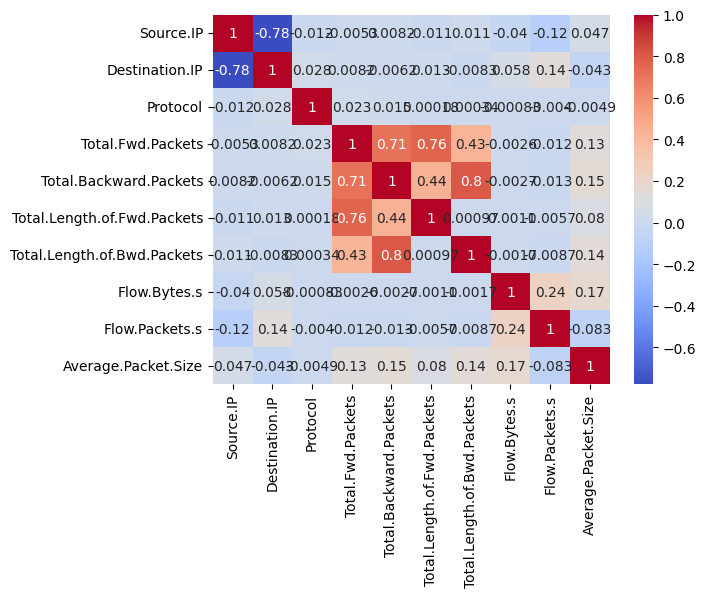

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

C:\Users\cs123\AppData\Local\Temp\ipykernel_13920\3312989954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_counts.index, y=traffic_counts.values, palette='viridis')


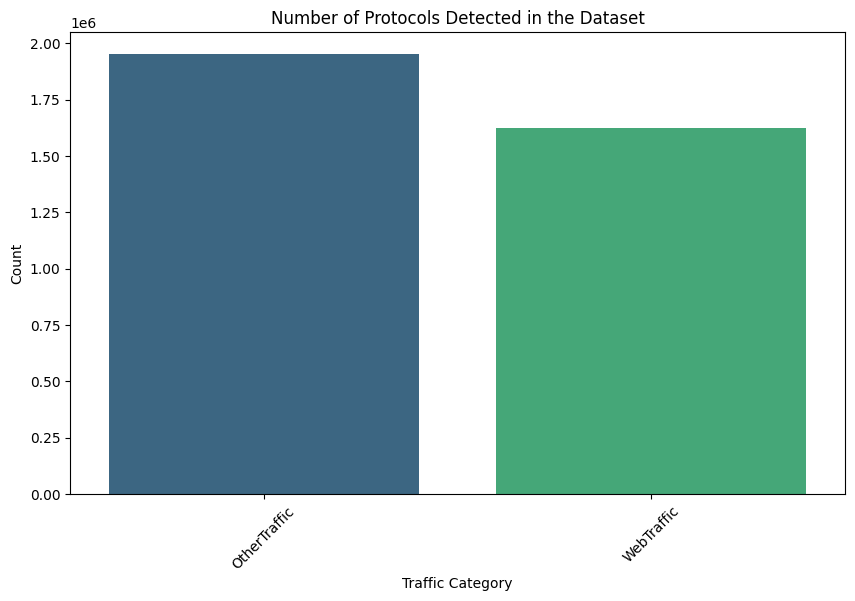

In [15]:
# Count the occurrences of each traffic category
traffic_counts = df["traffic_category"].value_counts()

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x=traffic_counts.index, y=traffic_counts.values, palette='viridis')
plt.title("Number of Protocols Detected in the Dataset")
plt.xlabel("Traffic Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
